# **Practice 3 - Naive Bayes and Linear Regression** 
## Machine Learning – LECD, LEEC
### Informatics Engineering Department

## Useful documentation
- Pandas – [https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/)
- Numpy – [https://numpy.org/doc/stable/](https://numpy.org/doc/stable/)
- Scikit-learn – [https://scikit-learn.org/stable/documentation.html](https://scikit-learn.org/stable/documentation.html)
- Matplotlib – [https://matplotlib.org/contents.html](https://matplotlib.org/contents.html)
- Seaborn – [https://seaborn.pydata.org/](https://seaborn.pydata.org/)



# Part 1 - Naive Bayes

#### Let's use the dataset `placement.csv` containing applicants data regarding placement on a certain campus. The `status` column is the target variable.


#### Ex 1 - Import the following libraries:

pandas\
numpy\
seaborn\
matplotlib.pyplot\
from sklearn.model_selection, train_test_split\
from sklearn.metrics, classification_report, confusion_matrix, accuracy_score

In [39]:
# Answer here
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


#### Ex 2 - Load data from local csv file using `pd.read_csv`

In [40]:
# Answer here
df = pd.read_csv('placement.csv')

#### Ex 3 - Explore the dataset (dataframe) in terms of `shape`, `info`, `describe()`, `isnull().sum`, `count` and `groupby`

In [41]:
status_by_degree = df.groupby ('degree_t')['status'].agg(count = 'count')
print(status_by_degree)

           count
degree_t        
Comm&Mgmt    145
Others        11
Sci&Tech      59


In [42]:
# Answer here
df.shape
df.info
df.describe()
df.isnull().sum
df.count

<bound method DataFrame.count of      sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status  
0     Sci&Tech     No  

#### Ex 4 - Explore with visually `seaborn` library

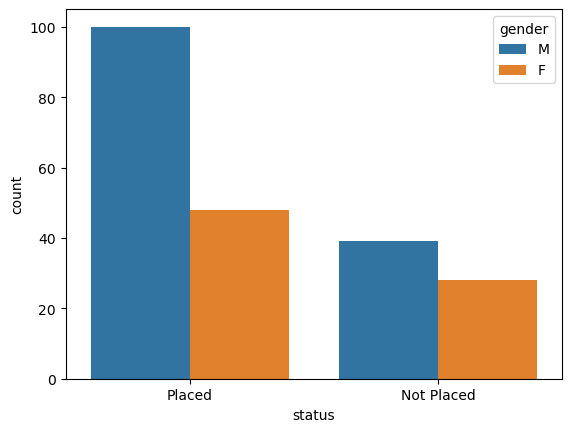

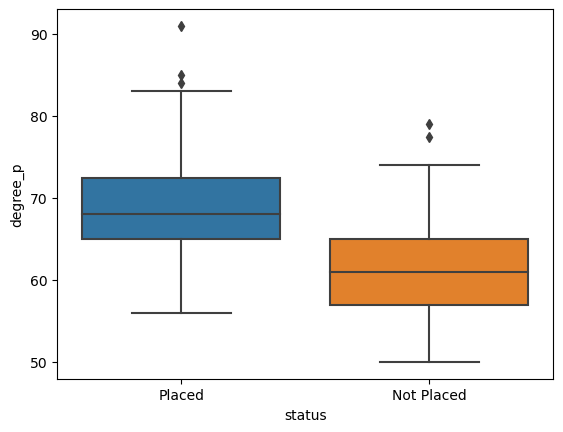

In [43]:
# Answer here
sns.countplot(x = 'status', hue = 'gender',data = df)
plt.show()

sns.boxplot(x = 'status', y = 'degree_p', data=df)
plt.show()

##sns.pairplot()

#### Ex 5 - Transform the one of the categorical features (e.g. workex) into numericals with `pd.get_dummies` (use the option `drop_first=True` to get the one-hot enconding) and join the result with the dataframe with `pd.concat`

In [44]:
# Answer here
workex_dummies = pd.get_dummies(df['workex'], drop_first= True)
df = pd.concat([df, workex_dummies],axis = 1)
df = df.rename(columns = {'Yes' : 'workex_dummies'})
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,workex_dummies
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,1
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,1
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,0


#### Ex 6 - Check the types using `df.types` and drop all categorical/object columns (other preprocessing could be helpful, this is the simplest form). For the latter, use `df.select_dtypes` and `df.drop`. Extra: as a categorical variable, should `status` be removed also?

In [45]:
# Answer here
df.dtypes
categorical_columns = df.select_dtypes(include = ['object', 'category']).columns
categorical_columns = categorical_columns.drop('status') ##fazer drop de tudo (categórico) à exceção de status
df.drop(categorical_columns,axis = 1, inplace = True) ##a mudança é feita no proprio df
df

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,workex_dummies
0,1,67.00,91.00,58.00,55.0,58.80,Placed,0
1,2,79.33,78.33,77.48,86.5,66.28,Placed,1
2,3,65.00,68.00,64.00,75.0,57.80,Placed,0
3,4,56.00,52.00,52.00,66.0,59.43,Not Placed,0
4,5,85.80,73.60,73.30,96.8,55.50,Placed,0
...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,Placed,0
211,212,58.00,60.00,72.00,74.0,53.62,Placed,0
212,213,67.00,67.00,73.00,59.0,69.72,Placed,1
213,214,74.00,66.00,58.00,70.0,60.23,Placed,0


#### Ex 7 - Create X and y (features and target), X is all variables but `status` and `sl_no`, and y = `status`. Note that `sl_no` is just a serial number (similar to an id number), having no impact in the status

In [ ]:
# Answer here
X = df.drop(['status', 'sl_no'],axis = 1)
y= df['status'] ##tirar sempre colunas que são serials (tipo o ID)

#### Ex 8 - Create train and test splits (30% for test) using `train_test_split`. Other % can be tested. Fix the `random_state`

In [ ]:
# Answer here
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, test_size = 0.30) ##

#### Ex 9 - Import the classifier `GaussianNB` from `sklearn.naive_bayes`

In [50]:
# Answer here
from sklearn.naive_bayes import GaussianNB

#### Ex 10 - `Instantiate` a `GaussianNB` model and `train` with the `fit` method

In [51]:
# Answer here
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

#### Ex 10 - Get predictions `y_pred` with the `predict` method 

In [52]:
# Answer here
y_pred = gnb.predict(X_test)

#### Ex 11 - Print `classification report`, `confusion matrix` and `accuracy score`

Classification Report: 
               precision    recall  f1-score   support

  Not Placed       0.75      0.57      0.65        21
      Placed       0.82      0.91      0.86        44

    accuracy                           0.80        65
   macro avg       0.78      0.74      0.75        65
weighted avg       0.79      0.80      0.79        65

Confusion Matrix: 
 [[12  9]
 [ 4 40]]
Accuracy Score:  0.8


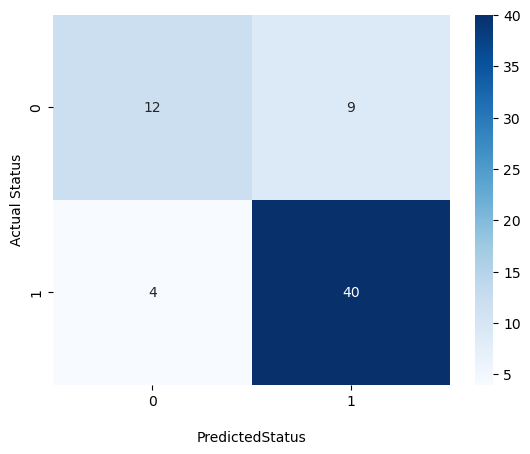

In [ ]:
# Answer here
report = classification_report(y_test, y_pred)
print('Classification Report: \n', report)
cf_matrix=confusion_matrix(y_test,y_pred)
print ('Confusion Matrix: \n', cf_matrix)
acc_score=accuracy_score(y_test,y_pred)
print( 'Accuracy Score: ',acc_score)
# graphical confusion matrix
ax = sns.heatmap(cf_matrix, annot = True, cmap = 'Blues')
ax.set_xlabel('\nPredictedStatus')
ax.set_ylabel('Actual Status' )
plt.show()

# Part 2 - Linear Regression

#### Let's use the two datasets, namely, `LR1.txt` and `LR2.txt` for Linear Regression. Whereas the first is univariate, the second is multivariate

#### Ex1 - Start with the necessary imports. Note that this is only necessary if you are starting from Part 2

pandas\
numpy\
matplotlib.pyplot\
seaborn

### Univariate Case

#### Ex2 - Load `LR1.txt` and give names `A` and `B`to the features

In [ ]:
# Answer here
... = pd.read_csv(..., names = [...]) 

#### Ex3 - Get some insight into the data, e.g. take a look at the `head` and use the `describe()` method

In [ ]:
# Answer here
...head()
...describe()

#### Ex4 - Visualize the relationship between A and B. Use `matplotlib` to create a `scatter plot` of A (x-axis) against B (y-axis)

In [ ]:
# Answer here
... = data1['A'].values
y = data1[...].values
m = len(y)
plt.scatter(...,...)
plt.ylabel('B')
plt.xlabel('A')
plt.title('A versus B')
plt.show()

#### Ex 5 - Import the class `LinearRegression` from `sklearn.linear_model` and instantiate a model `lr` 

In [ ]:
# Answer here
from ... import ...
lr = ...

#### Ex6 - Create `X` and `y`, and train the model `lr` with the `fit` method 

In [ ]:
# Answer here
X = np.array(...[...]).reshape(-1, 1)
y = np.array(...[...]).reshape(-1, 1)
lr.fit(...,...)

#### Ex7 - Create a data set `xtest` containing evenly spaced 1000 points to test the model using `np.linspace` over an appropriate range

In [ ]:
# Answer here
xtest = np.linspace(..., ..., num = ...)

#### Ex8 - Predict the output `ypred` using the model with the `predict` method

In [ ]:
# Answer here
... = lr.predict(xtest.reshape(-1, 1))

#### Ex9 - Plot the prediction results (i.e., a `line`) on the top of a `scatter plot` with the original data points

In [ ]:
# Answer here
plt.scatter(...,...)
plt.plot(..., ..., color = 'red')
plt.show()

#### Ex10 - Analyze the model's parameters, namely, `slope` and `intercept`.

In [ ]:
# Answer here
print('Model slope: ', lr...)
print('Model intercept: ', lr...)

#### Ex11 - Compute some errors metrics, namely, `mean_squared_error` and `mean_absolute_error`. Note: need to import them first

mean_squared_error, mean_absolute_error both from sklearn.metrics

In [ ]:
# Answer here
from ... import ..., ...

In [ ]:
predicted_B = lr.predict(np.array(X.reshape(-1,1)))

model_error = mean_squared_error(..., ...)
print(f"The mean squared error of the optimal model is {model_error:.2f}")

#### Ex12 - Comment on those errors

##### Answer here:

#### Ex12 - Using the estimated model, predict B for two arbitrary new values of A

In [ ]:
# Answer here
A1 = ...
A2 = ...
print(lr.predict(np.array([[...]])))
print(lr.predict(np.array([[...]])))

### Multivariate (2D) Case - Multidimensional linear regression (analyze and extend as homework)

#### Ex12 - Load `LR2.txt`, check head, shape, and describe

In [ ]:
# Answer here
... = pd.read_csv(..., names = [...])
....head()

#### Ex13 - Define `X` and `y`, and get the length `m` of `y`

In [ ]:
# Answer here
X = data2.drop(labels = [...], axis = 1) 
y = data2[...]
m = len(y)

#### Ex14 - Before proceeding to training, define a normalization (z-score standardization) function "by hand" that returns the `normalized data` and the original `mean` and `standard deviation`

In [ ]:
# Answer here
def featureStandardNormalize(X):
    mean = np.mean(..., axis = 0) # Define the mean per column
    std = np.std(..., axis = 0) # Define the standard deviation per column
    X_norm = (X - ...) / ... # define scaling transformation

    return ... # return the values.

#### Ex15 - Why is it important to save and return the original mean and standard deviation?

##### Answer here:

#### Ex16 - Apply the newly defined function to `X`

In [ ]:
# Answer here
X_norm,...,.... = featureStandardNormalize(...)

#### Ex17 - Same as Ex16, but now use the `StandardScaler` (z-score) from `sklearn.preprocessing`. Note: need to import it first

In [ ]:
# Answer here
from ... import ...
zscaler = ....
X_norm2 = ....fit_transform(...)

#### Ex18 - Compare the normalized data from Ex16 and Ex17. Concatenation along the axis 1 can be used to easily compare dataframes side by side

In [ ]:
# Answer here
X_norm2 = pd.DataFrame(X_norm2, columns = ['A', 'B'])

compare = pd.concat([..., ...], axis = 1)
compare.head()

#### Ex19 - `Instantiate` and `fit` a linear regression model with `fit_intercept = True` as argument

In [ ]:
# Answer here
import warnings
warnings.filterwarnings('ignore')
model2 = ...(fit_intercept = True)
model2.fit(...,...)

#### Ex20 - `Predict` for an arbitrary new point, but first normalize it

In [ ]:
# Answer here
newInput = [...,...]
newInputnormalized = (newInput-...)/...
print(model2.predict(np.array([...])))